In [1]:
pip install -U Sastrawi

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install -U imbalanced-learn

In [3]:
pip install -U nltk

Note: you may need to restart the kernel to use updated packages.


In [4]:
# reading data
import re
import string
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import pandas as pd
import numpy as np
import sklearn
from imblearn.over_sampling import SMOTE
from sklearn.metrics import balanced_accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [5]:
import torch
torch.cuda.is_available()

True

In [6]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
data_cleaned = pd.read_csv('C:/Users/andre/Downloads/SatriaDataScience-main/data_cleaned-no_stemstop.csv', encoding='latin-1')
data_cleaned.head()

,c_text2,label
0,kunjungan prabowo ini untuk meresmikan dan men...,Sumber Daya Alam
1,anies dapat tepuk tangan meriah saat jadi rekt...,Politik
2,memang benar sih pendukung ada yang bodoh begi...,Demografi
3,sewaktu anies bersikap kritis ke kerja pak pra...,Politik
4,anies baswedan harap asn termasuk tni dan polr...,Politik


In [8]:
# check missing values
data_cleaned.isna().sum()

c_text2    0
label      0
dtype: int64

In [9]:
# check data shape
data_cleaned.shape

(4264, 2)

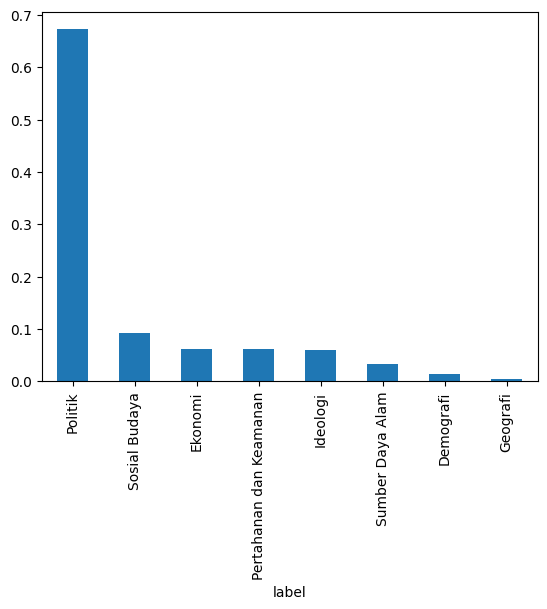

In [10]:
# check target balance
data_cleaned['label'].value_counts(normalize = True).plot.bar()
plt.show()

In [11]:
data_cleaned_2Class = data_cleaned.copy()
data_cleaned_2Class['label2'] = data_cleaned['label']

data_cleaned_2Class.loc[(data_cleaned_2Class['label2'] != 'Politik'), 'label2'] = 'NonP'

data_cleaned_2Class['label2'].head(15)

0        NonP
1     Politik
2        NonP
3     Politik
4     Politik
5     Politik
6        NonP
7     Politik
8     Politik
9     Politik
10       NonP
11       NonP
12       NonP
13    Politik
14       NonP
Name: label2, dtype: object

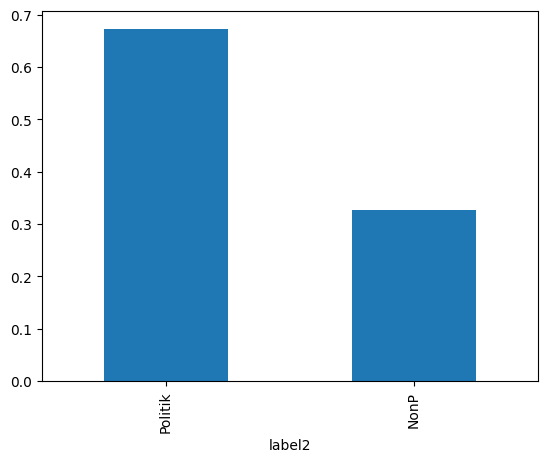

In [12]:
data_cleaned_2Class['label2'].value_counts(normalize = True).plot.bar()
plt.show()

In [13]:
data_cleaned_2Class.head(5)

,c_text2,label,label2
0,kunjungan prabowo ini untuk meresmikan dan men...,Sumber Daya Alam,NonP
1,anies dapat tepuk tangan meriah saat jadi rekt...,Politik,Politik
2,memang benar sih pendukung ada yang bodoh begi...,Demografi,NonP
3,sewaktu anies bersikap kritis ke kerja pak pra...,Politik,Politik
4,anies baswedan harap asn termasuk tni dan polr...,Politik,Politik


In [14]:
!pip install nlp_id

In [15]:
# text preprocessing
import re
from sklearn.base import OneToOneFeatureMixin
from nlp_id.lemmatizer import Lemmatizer
from nlp_id.tokenizer import Tokenizer
from nlp_id.stopword import StopWord

lemmatizer = Lemmatizer()
tokenizer = Tokenizer()
stopword = StopWord()

# create a list text
text = list(data_cleaned_2Class['c_text2'])

corpus = []
for i in range(len(text)):
    r = re.sub('[^a-zA-Z]', ' ', text[i])
    r = r.lower()
    r = r.split()
    r = [word for word in r if word not in stopword.get_stopword()]
    r = [lemmatizer.lemmatize(word) for word in r]
    r = ' '.join(r)
    corpus.append(r)

#assign corpus to data['text']
data_cleaned_2Class['c_text2'] = corpus
data_cleaned_2Class.head()

,c_text2,label,label2
0,kunjung prabowo resmi serah proyek bantu air b...,Sumber Daya Alam,NonP
1,anies tepuk tangan riah rektor wajib mata kuli...,Politik,Politik
2,dukung bodoh dukung ridwan kamil skema balik m...,Demografi,NonP
3,anies sikap kritis kerja prabowo anggap engga ...,Politik,Politik
4,anies baswedan harap asn tni polri pegang sump...,Politik,Politik


### Training using 8 classes (Politik and 7 other non political issues) to count balanced accuracy

In [16]:
# Create Feature and Label sets using 8 classes
X8 = data_cleaned_2Class['c_text2']
y8 = data_cleaned_2Class['label']

# train test split (66% train - 33% test)
from sklearn.model_selection import train_test_split
X8_train, X8_test, y8_train, y8_test = train_test_split(X8, y8, test_size=0.33, random_state=123)

print('Training Data :', X8_train.shape)
print('Testing Data : ', X8_test.shape)

Training Data : (2856,)
Testing Data :  (1408,)


In [17]:
# Train Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X8_train_cv = cv.fit_transform(X8_train)
X8_train_cv.shape

(2856, 7300)

In [18]:
# Training Logistic Regression model
from sklearn.linear_model import LogisticRegression
lr8 = LogisticRegression(class_weight='balanced')
lr8.fit(X8_train_cv, y8_train)

# transform X_test using CV
X8_test_cv = cv.transform(X8_test)

# generate predictions
predictions8 = lr8.predict(X8_test_cv)
predictions8

array(['Ideologi', 'Sosial Budaya', 'Politik', ..., 'Sosial Budaya',
       'Sumber Daya Alam', 'Politik'], dtype=object)

In [19]:
classes = data_cleaned['label'].unique()
classes

array(['Sumber Daya Alam', 'Politik', 'Demografi',
       'Pertahanan dan Keamanan', 'Ideologi', 'Ekonomi', 'Sosial Budaya',
       'Geografi'], dtype=object)

In [20]:
classNames = ['Demografi', 'Ekonomi', 'Geografi', 'Ideologi', 'Pertahanan dan Keamanan', 'Politik', 'Sosial Budaya', 'Sumber Daya Alam']

In [22]:
# confusion matrix
import pandas as pd
from sklearn import metrics

df8_cm = pd.DataFrame(metrics.confusion_matrix(y8_test,predictions8), index=classNames, columns=classNames)
df8_cm

,Demografi,Ekonomi,Geografi,Ideologi,Pertahanan dan Keamanan,Politik,Sosial Budaya,Sumber Daya Alam
Demografi,4,2,0,1,0,5,3,1
Ekonomi,0,66,0,1,1,15,7,5
Geografi,0,0,0,0,0,3,2,0
Ideologi,0,1,0,35,2,43,4,2
Pertahanan dan Keamanan,0,0,0,2,55,21,2,2
Politik,8,18,2,52,41,742,49,22
Sosial Budaya,3,3,0,6,4,49,57,11
Sumber Daya Alam,2,7,1,0,3,13,10,20


In [23]:
# check the number of each label
y8_test.value_counts().sort_values(ascending=False)

label
Politik                    934
Sosial Budaya              133
Ekonomi                     95
Ideologi                    87
Pertahanan dan Keamanan     82
Sumber Daya Alam            56
Demografi                   16
Geografi                     5
Name: count, dtype: int64

In [24]:
df8_cm.sum(axis=1).sort_values(ascending=False)

Politik                    934
Sosial Budaya              133
Ekonomi                     95
Ideologi                    87
Pertahanan dan Keamanan     82
Sumber Daya Alam            56
Demografi                   16
Geografi                     5
dtype: int64

In [25]:
# calculate the scores
cnf8_matrix = metrics.confusion_matrix(y8_test,predictions8)

FP = cnf8_matrix.sum(axis=0) - np.diag(cnf8_matrix)
FN = cnf8_matrix.sum(axis=1) - np.diag(cnf8_matrix)
TP = np.diag(cnf8_matrix)
TN = cnf8_matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP)
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)


In [26]:
# calculate the balanced accuracy score
Balanced_Acc8 = 0.5*(TPR + TNR)

print("Balanced accuracy: ")
df8_BA = pd.DataFrame({'class': classNames, 'balanced accuracy' : Balanced_Acc8}, columns=['class', 'balanced accuracy'])
df8_BA

Balanced accuracy: 


,class,balanced accuracy
0,Demografi,0.620330
1,Ekonomi,0.835563
2,Geografi,0.498931
3,Ideologi,0.677682
4,Pertahanan dan Keamanan,0.816135
5,Politik,0.740043
6,Sosial Budaya,0.684090
7,Sumber Daya Alam,0.662669


In [27]:
# average balanced accuracy
print('Average accuracy: ', np.mean(ACC))
print('Average balanced accuracy: ', df8_BA['balanced accuracy'].mean())

Average accuracy:  0.923828125
Average balanced accuracy:  0.6919305164736238


### Training using 2 classes to count balanced accuracy

In [28]:
# Create Feature and Label sets using 2 classes
X2 = data_cleaned_2Class['c_text2']
y2 = data_cleaned_2Class['label2']

# train test split (66% train - 33% test)
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.33, random_state=123)

print('Training Data :', X2_train.shape)
print('Testing Data : ', X2_test.shape)

Training Data : (2856,)
Testing Data :  (1408,)


In [29]:
# Train Bag of Words model
cv2 = CountVectorizer()

X2_train_cv = cv2.fit_transform(X2_train)
X2_train_cv.shape

(2856, 7300)

In [41]:
from sklearn.utils.class_weight import compute_class_weight

compute_class_weight(class_weight="balanced", classes=np.unique(y2_train), y=y2_train)

array([1.54712893, 0.73874806])

In [335]:
# Training Logistic Regression model
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import balanced_accuracy_score

lr2 = LogisticRegression(class_weight='balanced', C=0.1)

param_grid = {
    'max_iter':[20,30,40,50],
    'multi_class':['ovr','auto']
}
grid_search = GridSearchCV(lr2, param_grid, cv=5, scoring='balanced_accuracy')
grid_search.fit(X2_train_cv, y2_train)

# Best model
best_model = grid_search.best_estimator_


best_model.fit(X2_train_cv, y2_train)

# transform X_test using CV
X2_test_cv = cv2.transform(X2_test)

# generate predictions
predictions2 = best_model.predict(X2_test_cv)
predictions2

array(['NonP', 'NonP', 'Politik', ..., 'NonP', 'NonP', 'Politik'],
      dtype=object)

In [336]:
best_model

LogisticRegression(C=0.1, class_weight='balanced', max_iter=30,
                   multi_class='ovr')

In [337]:
classNamesNP = ['NonP', 'Politik']


In [338]:
# confusion matrix
df2_cm = pd.DataFrame(metrics.confusion_matrix(y2_test,predictions2), index=classNamesNP, columns=classNamesNP)
df2_cm

,NonP,Politik
NonP,323,151
Politik,187,747


In [339]:
# check the number of each label
y2_test.value_counts().sort_values(ascending=False)

label2
Politik    934
NonP       474
Name: count, dtype: int64

In [340]:
df2_cm.sum(axis=1).sort_values(ascending=False)

Politik    934
NonP       474
dtype: int64

In [341]:
# calculate the scores
cnf2_matrix = metrics.confusion_matrix(y2_test,predictions2)

FP = cnf2_matrix.sum(axis=0) - np.diag(cnf2_matrix)
FN = cnf2_matrix.sum(axis=1) - np.diag(cnf2_matrix)
TP = np.diag(cnf2_matrix)
TN = cnf2_matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP)
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)


In [342]:
# calculate the balanced accuracy score
Balanced_Acc2 = 0.5*(TPR + TNR)

print("Balanced accuracy: ")
df2_BA = pd.DataFrame({'class': classNamesNP, 'balanced accuracy' : Balanced_Acc2}, columns=['class', 'balanced accuracy'])
df2_BA

Balanced accuracy: 


,class,balanced accuracy
0,NonP,0.74061
1,Politik,0.74061


In [343]:
# average balanced accuracy
avg_ACC2 = np.mean(ACC)
BA2 = df2_BA['balanced accuracy'].mean()

print('Average accuracy: ', avg_ACC2)
print('Average balanced accuracy: ', BA2)

Average accuracy:  0.7599431818181818
Average balanced accuracy:  0.7406102331969028


### Training only non political issues to obtain specific model

In [344]:
!pip install accelerate -U

In [345]:
# Create Feature and Label sets using 7 classes
# create a subset of the initial dataset
data_cleaned_7Class = data_cleaned_2Class

data_cleaned_7Class = data_cleaned_7Class[data_cleaned_7Class['label'] != 'Politik']
data_cleaned_7Class.head(10)

X7 = data_cleaned_7Class['c_text2']
y7 = data_cleaned_7Class['label']

from sklearn.model_selection import train_test_split

X7_train, X7_test, y7_train, y7_test = train_test_split(X7, y7, test_size=0.2, random_state=123)

print('Training Data :', X7_train.shape)
print('Testing Data : ', X7_test.shape)

X7_train = list(X7_train)
X7_test = list(X7_test)
y7_train= list(y7_train)
y7_test= list(y7_test)

X7

Training Data : (1117,)
Testing Data :  (280,)


0       kunjung prabowo resmi serah proyek bantu air b...
2       dukung bodoh dukung ridwan kamil skema balik m...
6       prabowo kemenhan tim satgas air unhan kaji ban...
10      isu basi kait fakta anies ganti pancasila sist...
11      ganjar pranowomahfud md tekan siap butuh dasar...
                              ...                        
4252    anies bilang debat selesai tinggal kalimat lon...
4254    program pasang capres cawapres ganjar pranowo ...
4261    dapat masuk akal irrational tbh but neverthele...
4262    lihat ganjar kecimpung lgislatif eksekutif bhk...
4263    acara masak calon presiden nomor urut habis in...
Name: c_text2, Length: 1397, dtype: object

In [41]:
# Create Feature and Label sets using 7 classes

In [346]:
from transformers import DistilBertTokenizer
import torch


model_name = "cahya/distilbert-base-indonesian"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tokenizer = DistilBertTokenizer.from_pretrained(model_name)

In [347]:
# Tokenization Function
from tqdm import tqdm

def tokenize(sentences, tokenizer, max_length):
    input_ids, attention_masks = [], []
    for sentence in tqdm(sentences):
        inputs = tokenizer.encode_plus(
            sentence,
            add_special_tokens=True,
            max_length=max_length,
            pad_to_max_length=True,
            return_attention_mask=True,
            truncation=True
        )
        input_ids.append(inputs['input_ids'])
        attention_masks.append(inputs['attention_mask'])
    return np.array(input_ids), np.array(attention_masks)

MAX_LENGTH = 128

X_train_ids, X_train_masks = tokenize(X7_train, tokenizer, MAX_LENGTH)
X_val_ids, X_val_masks = tokenize(X7_test, tokenizer, MAX_LENGTH)

100%|███████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 570.36it/s]


In [348]:
X_val_ids.dtype

dtype('int32')

In [349]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y7_train_encoded= label_encoder.fit_transform(y7_train)
y7_test_encoded= label_encoder.fit_transform(y7_test)

#The label index
label_dict = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Label to index mapping:", label_dict)

Label to index mapping: {'Demografi': 0, 'Ekonomi': 1, 'Geografi': 2, 'Ideologi': 3, 'Pertahanan dan Keamanan': 4, 'Sosial Budaya': 5, 'Sumber Daya Alam': 6}


In [350]:
unique, counts = np.unique(y7_train_encoded, return_counts=True)
value_counts = dict(zip(unique, counts))

print(value_counts)

{0: 49, 1: 216, 2: 15, 3: 204, 4: 207, 5: 309, 6: 117}


In [47]:
# from collections import Counter
# from imblearn.over_sampling import BorderlineSMOTE

# import numpy as np

# X_train_combined = np.hstack((X_train_ids, X_train_masks))

# # Convert pandas Series to numpy array
# y_train_np = y7_train_encoded
# # Reshape y_train to match the shape of X_train_combined
# y_train_reshaped = y_train_np.reshape(-1, 1)

# bsmote = BorderlineSMOTE(random_state=42)
# X_train_resampled, y_train_resampled = bsmote.fit_resample(X_train_combined, y_train_reshaped)

# # After resampling, reshape y_train_resampled back to 1D array
# y_train_resampled = y_train_resampled.ravel()
# print(Counter(y_train_resampled))
# # Separate back into input_ids and attention_masks
# X_train_ids_resampled = X_train_resampled[:, :MAX_LENGTH]
# X_train_masks_resampled = X_train_resampled[:, MAX_LENGTH:]

In [351]:
from transformers import DistilBertTokenizer, DistilBertConfig, TFDistilBertModel
import tensorflow as tf
config = DistilBertConfig.from_pretrained(model_name, output_hidden_states=False, output_attentions=False)
DistilBERT = TFDistilBertModel.from_pretrained(model_name, config=config, from_pt=True)

# Input layer
input_ids_in = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='input_token', dtype='int32')
input_masks_in = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='masked_token', dtype='int32')

# Fungsi wrapper untuk model DistilBERT
def distilbert_model_wrapper(input_ids, attention_mask):
    return DistilBERT(input_ids=input_ids, attention_mask=attention_mask).last_hidden_state

# Model DistilBERT
distilbert_output = tf.keras.layers.Lambda(lambda x: distilbert_model_wrapper(x[0], x[1]))([input_ids_in, input_masks_in])

# Lapisan LSTM
X = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True))(distilbert_output)
X = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True))(X)  # Additional LSTM Layer
X = tf.keras.layers.GlobalMaxPool1D()(X)
X = tf.keras.layers.Dense(128, activation='relu')(X)  # Increased Dense Layer size
X = tf.keras.layers.Dropout(0.5)(X)  # Adjusted Dropout rate
X = tf.keras.layers.Dense(64, activation='relu')(X)
X = tf.keras.layers.Dropout(0.5)(X)
X = tf.keras.layers.Dense(len(label_dict), activation='softmax')(X)

# Model kompilasi
model = tf.keras.Model(inputs=[input_ids_in, input_masks_in], outputs=X)

for layer in DistilBERT.layers[-4:]:
    layer.trainable = True

# Definisi metrik Balanced Accuracy
class BalancedAccuracy(tf.keras.metrics.Metric):
    def __init__(self, name='balanced_accuracy', **kwargs):
        super(BalancedAccuracy, self).__init__(name=name, **kwargs)
        self.true_positives = self.add_weight(name='tp', initializer='zeros')
        self.true_negatives = self.add_weight(name='tn', initializer='zeros')
        self.false_positives = self.add_weight(name='fp', initializer='zeros')
        self.false_negatives = self.add_weight(name='fn', initializer='zeros')

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_pred = tf.argmax(y_pred, axis=1)
        y_true = tf.cast(y_true, tf.int64)

        true_positives = tf.reduce_sum(tf.cast(y_true * y_pred, tf.float32))
        true_negatives = tf.reduce_sum(tf.cast((1 - y_true) * (1 - y_pred), tf.float32))
        false_positives = tf.reduce_sum(tf.cast((1 - y_true) * y_pred, tf.float32))
        false_negatives = tf.reduce_sum(tf.cast(y_true * (1 - y_pred), tf.float32))

        self.true_positives.assign_add(true_positives)
        self.true_negatives.assign_add(true_negatives)
        self.false_positives.assign_add(false_positives)
        self.false_negatives.assign_add(false_negatives)

    def result(self):
        recall_pos = self.true_positives / (self.true_positives + self.false_negatives)
        recall_neg = self.true_negatives / (self.true_negatives + self.false_positives)
        return (recall_pos + recall_neg) / 2

    def reset_states(self):
        self.true_positives.assign(0)
        self.true_negatives.assign(0)
        self.false_positives.assign(0)
        self.false_negatives.assign(0)

# Mengkompilasi model dengan metrik balanced accuracy
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),  # Lower learning rate
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy', BalancedAccuracy()])
# Model summary (opsional)
model.summary()

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


The following Variables were used a Lambda layer's call (lambda), but
are not present in its tracked objects:
  <tf.Variable 'tf_distil_bert_model/distilbert/embeddings/word_embeddings/weight:0' shape=(32000, 768) dtype=float32>
  <tf.Variable 'tf_distil_bert_model/distilbert/embeddings/position_embeddings/embeddings:0' shape=(512, 768) dtype=float32>
  <tf.Variable 'tf_distil_bert_model/distilbert/embeddings/LayerNorm/gamma:0' shape=(768,) dtype=float32>
  <tf.Variable 'tf_distil_bert_model/distilbert/embeddings/LayerNorm/beta:0' shape=(768,) dtype=float32>
  <tf.Variable 'tf_distil_bert_model/distilbert/transformer/layer_._0/attention/q_lin/kernel:0' shape=(768, 768) dtype=float32>
  <tf.Variable 'tf_distil_bert_model/distilbert/transformer/layer_._0/attention/q_lin/bias:0' shape=(768,) dtype=float32>
  <tf.Variable 'tf_distil_bert_model/distilbert/transformer/layer_._0/attention/k_lin/kernel:0' shape=(768, 768) dtype=float32>
  <tf.Variable 'tf_distil_bert_model/distilbert/transform

In [352]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import os

output_dir = './model7_outputs'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

model_checkpoint = ModelCheckpoint(filepath=output_dir+'/weights.{epoch:02d}.hdf5', save_weights_only=True)
early_stopping = EarlyStopping(patience=3, monitor='val_loss', mode='min', verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', min_lr=0.000001, patience=1, mode='min', factor=0.1, verbose=1)

In [353]:
X_train_ids = np.array(X_train_ids)
X_train_masks = np.array(X_train_masks)

from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y7_train_encoded), y=y7_train_encoded)
class_weights = {i: class_weights[i] for i in range(len(class_weights))}
class_weights

{0: 3.2565597667638486,
 1: 0.7387566137566137,
 2: 10.638095238095238,
 3: 0.7822128851540616,
 4: 0.7708764665286404,
 5: 0.5164123901987979,
 6: 1.363858363858364}

In [354]:
history = model.fit(
    [X_train_ids, X_train_masks],
    y7_train_encoded,
    epochs=25,
    batch_size=16,
    validation_data=([X_val_ids, X_val_masks], y7_test_encoded),
    class_weight={0: 3.2565597667638486,
                     1: 0.7387566137566137,
                     2: 10.638095238095238,
                     3: 0.7822128851540616,
                     4: 0.7708764665286404,
                     5: 0.5164123901987979,
                     6: 1.363858363858364},
    callbacks=[model_checkpoint, early_stopping, reduce_lr]
)

Epoch 1/25
70/70 [==============================] - 39s 183ms/step - loss: 1.9932 - accuracy: 0.1594 - balanced_accuracy: 0.5036 - val_loss: 1.9135 - val_accuracy: 0.2214 - val_balanced_accuracy: 0.5029
Epoch 2/25
70/70 [==============================] - 10s 142ms/step - loss: 1.9329 - accuracy: 0.2328 - balanced_accuracy: 0.4993 - val_loss: 1.9056 - val_accuracy: 0.2536 - val_balanced_accuracy: 0.5028
Epoch 3/25
70/70 [==============================] - 10s 141ms/step - loss: 1.8956 - accuracy: 0.2578 - balanced_accuracy: 0.4993 - val_loss: 1.7960 - val_accuracy: 0.5036 - val_balanced_accuracy: 0.4950
Epoch 4/25
70/70 [==============================] - 10s 140ms/step - loss: 1.8513 - accuracy: 0.3089 - balanced_accuracy: 0.5009 - val_loss: 1.7467 - val_accuracy: 0.4393 - val_balanced_accuracy: 0.4976
Epoch 5/25
70/70 [==============================] - 10s 143ms/step - loss: 1.8011 - accuracy: 0.3518 - balanced_accuracy: 0.4966 - val_loss: 1.6837 - val_accuracy: 0.5321 - val_balanced_ac

Validation Loss: 1.243102788925171
Validation Accuracy: 0.5892857313156128
Validation Balanced Accuracy (TensorFlow Metric): 0.497655987739563
Balanced Accuracy (sklearn): 0.5391042559481136
        loss  val_loss  accuracy  val_accuracy
0   1.993154  1.913456  0.159355      0.221429
1   1.932931  1.905609  0.232766      0.253571
2   1.895630  1.795998  0.257833      0.503571
3   1.851301  1.746713  0.308863      0.439286
4   1.801058  1.683744  0.351835      0.532143
5   1.744434  1.594463  0.367055      0.503571
6   1.720224  1.518059  0.382274      0.553571
7   1.624507  1.453824  0.446732      0.553571
8   1.552797  1.414809  0.443151      0.546429
9   1.551602  1.402866  0.446732      0.546429
10  1.491212  1.390277  0.490600      0.514286
11  1.433756  1.327814  0.472695      0.557143
12  1.374738  1.275858  0.494181      0.625000
13  1.251493  1.240174  0.543420      0.600000
14  1.283405  1.267559  0.513876      0.553571
15  1.259026  1.246490  0.515667      0.589286
16  1.2067

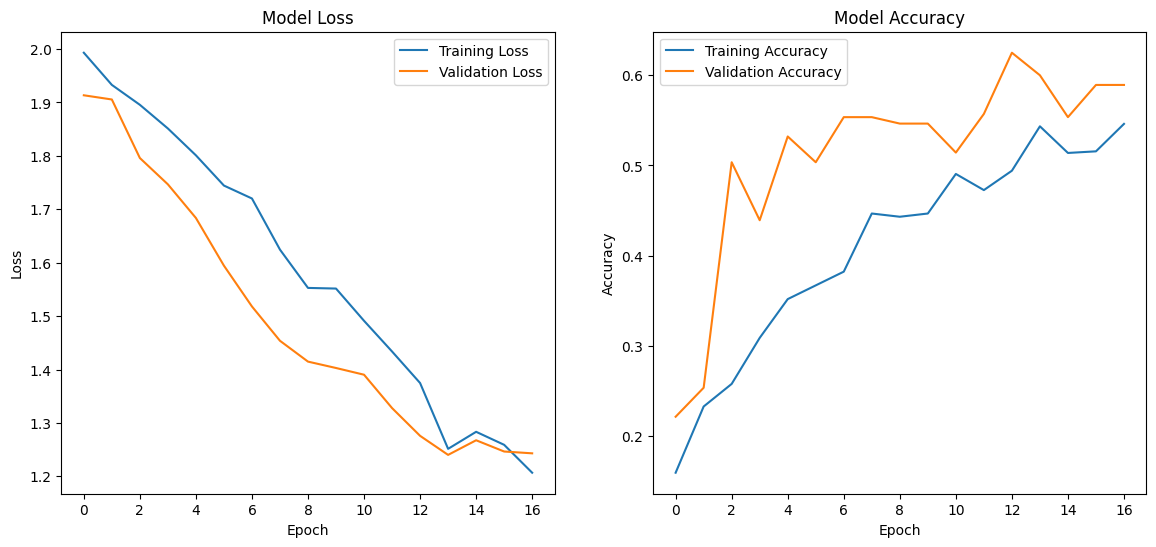

In [355]:
from sklearn.metrics import balanced_accuracy_score
import numpy as np

# Evaluate the model on the validation set
val_results = model.evaluate([X_val_ids, X_val_masks], y7_test_encoded, verbose=0)
val_loss = val_results[0]
val_accuracy = val_results[1]  # Assuming the second metric is accuracy
val_balanced_accuracy = val_results[2]  # Assuming the third metric is BalancedAccuracy

print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")
print(f"Validation Balanced Accuracy (TensorFlow Metric): {val_balanced_accuracy}")

# Predict on the validation set
val_predictions = model.predict([X_val_ids, X_val_masks])
val_pred_labels = np.argmax(val_predictions, axis=1)

# Calculate Balanced Accuracy using sklearn
balanced_acc = balanced_accuracy_score(y7_test_encoded, val_pred_labels)
print(f"Balanced Accuracy (sklearn): {balanced_acc}")

# Visualize training history
history_df = pd.DataFrame(history.history)
print(history_df[['loss', 'val_loss', 'accuracy', 'val_accuracy']])

# Plot training & validation loss values
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history_df['accuracy'], label='Training Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [358]:
print("Average balanced accuracy of 2 class and 7 class:", (BA2+balanced_acc)*0.5)

Average balanced accuracy of 2 class and 7 class: 0.6398572445725081


In [359]:
df_test = pd.read_csv("C:/Users/andre/Downloads/SatriaDataScience-main/test_cleaned-no_stemstop.csv",sep=",")

lemmatizer = Lemmatizer()
tokenizer = Tokenizer()
stopword = StopWord()

# create a list text
text_test = list(df_test['c_text2'])

corpus1 = []
for i in range(len(text_test)):
    r = re.sub('[^a-zA-Z]', ' ', text_test[i])
    r = r.lower()
    r = r.split()
    r = [word for word in r if word not in stopword.get_stopword()]
    r = [lemmatizer.lemmatize(word) for word in r]
    r = ' '.join(r)
    corpus1.append(r)

#assign corpus to data['text']
df_test['c_text3'] = corpus1
df_test.head()

,IDText,Text,c_text1,c_text2,c_text3
0,TXT0001,Lu mau org2 pro-demokrasi di negara ini bisa p...,Lu mau org2 prodemokrasi di negara ini bisa pu...,kamu mau orang-orang prodemokrasi di negara in...,orang orang prodemokrasi negara sempat ngelawa...
1,TXT0002,Prabowo ditanya soal hutang luar negeri dia me...,Prabowo ditanya soal hutang luar negeri dia me...,prabowo ditanya soal hutang luar negeri dia me...,prabowo hutang negeri hutang negeri indonesia ...
2,TXT0003,kiki_daliyo Ganjar Pranowo itulah beliau soso...,kikidaliyo Ganjar Pranowo itulah beliau sosok ...,kikidaliyo ganjar pranowo itulah beliau sosok ...,kikidaliyo ganjar pranowo sosok mengagunhkan n...
3,TXT0004,@kumparan Prabowo Gibran yang bisa melakukan i...,Prabowo Gibran yang bisa melakukan itu semua d...,prabowo gibran yang bisa melakukan itu semua d...,prabowo gibran rakyat
4,TXT0005,@sniperruben45 @uda_zulhendra @ainunnajib Lah ...,Lah justru yg gak nyambung junjungan elu aomkm...,lah justru yang gak nyambung junjungan kamu ao...,gak nyambung junjung aomkmkmkmk bicara etika n...


In [360]:
test_cv = cv.transform(corpus1)
test_cv.shape

(1000, 7300)

In [362]:
ispol = best_model.predict(test_cv)

In [363]:
df_test["LabelPol"]= ispol
ispol_filtered = df_test[df_test["LabelPol"] != "Politik"]
pd.DataFrame(ispol_filtered)

X_test2 = ispol_filtered["c_text3"]
print(X_test2)

2      kikidaliyo ganjar pranowo sosok mengagunhkan n...
4      gak nyambung junjung aomkmkmkmk bicara etika n...
5      nelayan jebak kredit macet ganjar pranowo mahf...
9      ganjarmahfud harap tumbuh ekonomi bahagia new ...
10     ganjar lipat anis anis nilai wo pancing anis k...
                             ...                        
986    anggar unt beli alutsita bekas t ga erti subst...
987    puncak komedi menteri tahan nilai jelek mantan...
992    sisa polarisasi loyalis jokowi loyalis prabowo...
995    bikin bangga deh ganjarmahfud alokasi belanja ...
998    biasa rembuk gaya pimpin ganjar gubernur jaten...
Name: c_text3, Length: 364, dtype: object


In [364]:
# Step 1: Split the text into lines
list(X_test2)

['kikidaliyo ganjar pranowo sosok mengagunhkan nilai nilai pancasila sadar hebat bahagia new year',
 'gak nyambung junjung aomkmkmkmk bicara etika ngatain anies omon omon nyenyek tuh anies sopan lho gak tertawa brutal pasang wajah ejek bunyi hutang nyuruh ajar ekonomi',
 'nelayan jebak kredit macet ganjar pranowo mahfud md buka pintu bebas',
 'ganjarmahfud harap tumbuh ekonomi bahagia new year',
 'ganjar lipat anis anis nilai wo pancing anis keluarin blunder angka hina beda wajar dgan angka',
 'saking pen junjung mrk brkuasa dlanggar mlempem letoy hdapi planggaran mrk bretika',
 'masyaallah gegap gempita sambut hadir ganjar pondok pesantren nawawi berjan purworejo semarak baris santri kunjung ganjar pranowo doa baik hajat kepala negara rakyat indonesia kabul tuhan maha esa aamiin',
 'ganjarmahfud harap tingkat investasi riset inovasi industri unggul nyata bahagia new year',
 'kampanye politik anies pilgub dki pengaruh dinamika masyarakat generasi tua pendam benci sulit baik generasi mu

In [365]:
X_test2

2      kikidaliyo ganjar pranowo sosok mengagunhkan n...
4      gak nyambung junjung aomkmkmkmk bicara etika n...
5      nelayan jebak kredit macet ganjar pranowo mahf...
9      ganjarmahfud harap tumbuh ekonomi bahagia new ...
10     ganjar lipat anis anis nilai wo pancing anis k...
                             ...                        
986    anggar unt beli alutsita bekas t ga erti subst...
987    puncak komedi menteri tahan nilai jelek mantan...
992    sisa polarisasi loyalis jokowi loyalis prabowo...
995    bikin bangga deh ganjarmahfud alokasi belanja ...
998    biasa rembuk gaya pimpin ganjar gubernur jaten...
Name: c_text3, Length: 364, dtype: object

In [366]:
from transformers import DistilBertTokenizer
import torch

model_name = "cahya/distilbert-base-indonesian"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tokenizer = DistilBertTokenizer.from_pretrained(model_name)

X_test_ids, X_test_masks = tokenize(X_test2, tokenizer, MAX_LENGTH)

100%|██████████████████████████████████████████████████████████████████████████████| 364/364 [00:00<00:00, 1785.98it/s]


In [367]:
y_test2 = model.predict([X_test_ids, X_test_masks])
predicted_labels = np.argmax(y_test2, axis=1)


In [368]:
predicted_labels

array([3, 5, 1, 1, 2, 5, 3, 1, 0, 1, 2, 1, 0, 6, 1, 3, 1, 1, 1, 1, 1, 1,
       4, 1, 4, 1, 1, 4, 4, 4, 1, 0, 4, 1, 3, 1, 4, 4, 2, 3, 2, 5, 1, 1,
       4, 5, 6, 4, 0, 1, 2, 5, 3, 4, 5, 1, 1, 4, 5, 1, 6, 1, 1, 1, 3, 4,
       4, 6, 3, 4, 1, 6, 4, 1, 0, 0, 4, 1, 1, 4, 3, 6, 1, 4, 1, 1, 4, 1,
       5, 4, 1, 4, 4, 4, 4, 3, 4, 1, 5, 1, 4, 1, 5, 4, 1, 3, 3, 0, 6, 1,
       1, 1, 1, 1, 4, 4, 1, 4, 5, 3, 4, 0, 1, 3, 3, 1, 1, 1, 1, 1, 3, 3,
       4, 1, 4, 1, 4, 1, 0, 2, 1, 4, 0, 4, 1, 4, 2, 1, 1, 4, 4, 4, 4, 1,
       1, 1, 1, 1, 3, 6, 3, 6, 4, 1, 6, 1, 5, 2, 6, 1, 6, 1, 5, 1, 1, 5,
       4, 1, 3, 1, 3, 5, 5, 4, 1, 3, 4, 1, 1, 1, 4, 1, 4, 1, 3, 3, 1, 5,
       1, 1, 4, 1, 0, 4, 6, 3, 4, 2, 1, 1, 0, 4, 5, 1, 6, 1, 1, 4, 1, 3,
       1, 4, 1, 1, 1, 1, 1, 6, 5, 1, 4, 1, 3, 2, 4, 4, 5, 6, 6, 4, 4, 1,
       3, 4, 1, 1, 2, 4, 1, 5, 4, 4, 4, 1, 6, 3, 0, 1, 3, 2, 1, 6, 5, 1,
       4, 4, 6, 3, 1, 2, 3, 1, 2, 1, 1, 5, 3, 1, 1, 4, 4, 1, 1, 4, 1, 3,
       5, 1, 3, 3, 1, 1, 3, 4, 1, 0, 3, 3, 1, 4, 3,

In [369]:
string_labels = [list(label_dict.keys())[list(label_dict.values()).index(label)] for label in predicted_labels]


In [370]:
ispol_filtered["LabelPol"] = string_labels

In [371]:
ispol_filtered.shape

(364, 6)

In [372]:
df_test1= df_test.drop(df_test[df_test["LabelPol"] == "NonP"].index)

In [373]:
df_test1.shape

(636, 6)

In [374]:
hasil = pd.concat([df_test1,ispol_filtered], axis =0)

In [375]:
hasil.sort_values(by=["IDText"], inplace = True)

In [377]:
jawaban = hasil[["IDText","LabelPol"]]
jawaban.rename(columns={"IDText":"IDText","LabelPol":"Kelas"}, inplace = True)
jawaban
jawaban.to_csv("C:/Users/andre/Downloads/SD2024040000377.csv",sep=",",index=False)